# Preliminaries

### Imports

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing

### Preprocessing

Reading the combined data

In [4]:
df = pd.read_csv('CleanedData/dataset.csv')
print(df.columns)

Index(['isAdult', 'releaseYear', 'runtimeMinutes', 'genres', 'lifetimeGross',
       'nrOfReleases', 'director_nrOfMovies', 'nrOfEmployees', 'nrOfActors',
       'averageRating', 'numVotes', 'sameYearTotalMoviesReleased'],
      dtype='object')


Transforming the target into binary classification

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393), (1.0, 0.7058823529411765, 0.5098039215686274)]


/Applications/Custom_Installs/anaconda3/envs/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


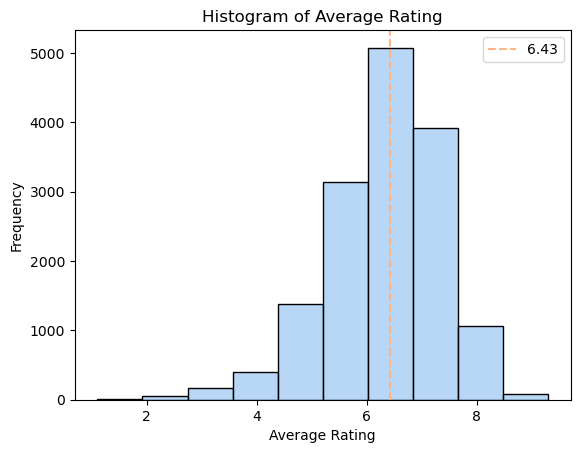

In [11]:
import seaborn as sns

pastel_colors = sns.color_palette("pastel")[0:2]
print(pastel_colors)

sns.histplot(df['averageRating'], bins=10, color=pastel_colors[0])
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Average Rating')
plt.axvline(x=6.43, color=pastel_colors[1], linestyle='--', label='6.43')
plt.legend()
plt.show()

6.43

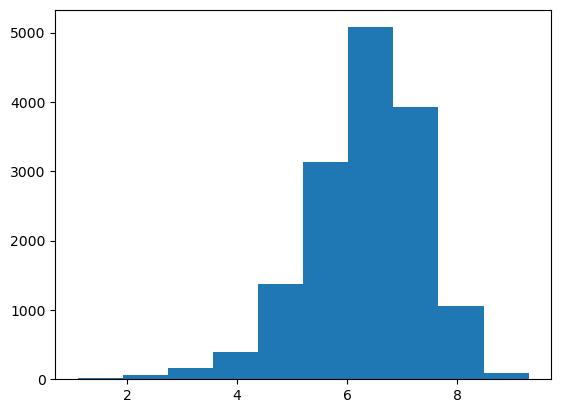

In [7]:
hist, bins, _ = plt.hist(df['averageRating'], bins=10)
max_bin_index = np.argmax(hist)
high_point_mid = (bins[max_bin_index] + bins[max_bin_index + 1]) / 2
high_point_mid

In [12]:
# Currently the target is in the form of a float, we need to convert it to a categorical variable
# such that 0 is bad, 1 is neutral, and 2 is good
print(df['averageRating'].describe())

df['averageRating'] = np.where((df['averageRating'] >= 0) & (df['averageRating'] <= 6.43), 0, 1)

count    15290.000000
mean         6.342459
std          1.032193
min          1.100000
25%          5.800000
50%          6.400000
75%          7.100000
max          9.300000
Name: averageRating, dtype: float64


EDA & Data Cleaning

1. Removing the isAdult feature

In [13]:
df['isAdult'].unique()

array([0, 1])

/Applications/Custom_Installs/anaconda3/envs/ML/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


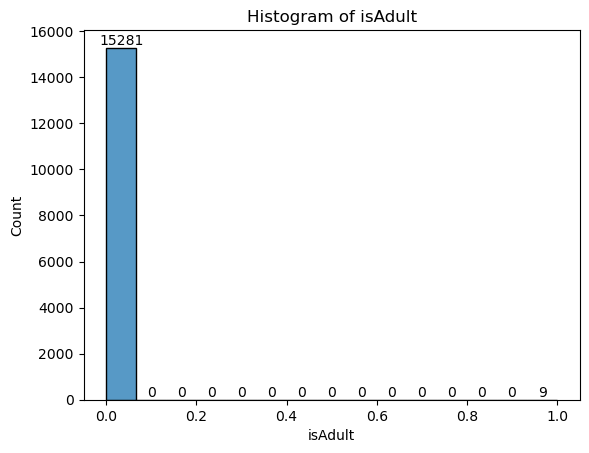

In [14]:
sns.histplot(data=df, x='isAdult')
plt.xlabel('isAdult')
plt.ylabel('Count')
plt.title('Histogram of isAdult')

for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [15]:
# Remove the isAdult column from the dataset since there are only 4 adult movies in the dataset
df = df.drop(columns=['isAdult'])

Checking the releaseYear values

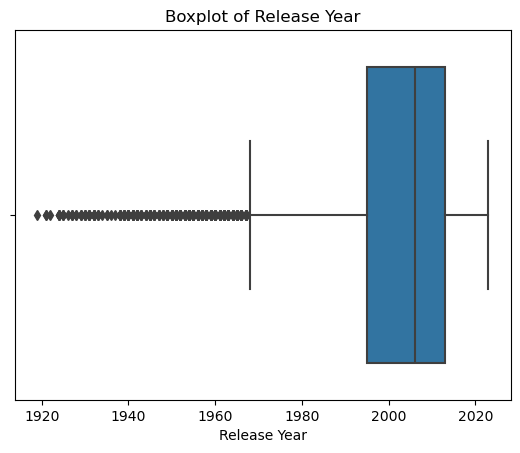

In [16]:
sns.boxplot(data=df, x='releaseYear')
plt.title('Boxplot of Release Year')
plt.xlabel('Release Year')
plt.show()

Checking the runtimeMinutes values

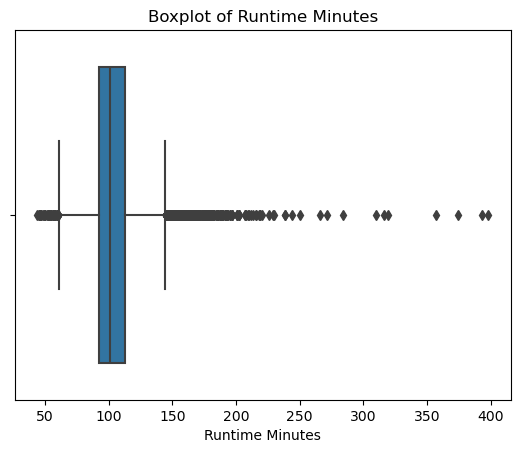

In [17]:
sns.boxplot(data=df, x='runtimeMinutes')
plt.title('Boxplot of Runtime Minutes')
plt.xlabel('Runtime Minutes')
plt.show()

In [18]:
below_50 = df[df['runtimeMinutes'] < 50].shape[0]
over_240 = df[df['runtimeMinutes'] > 240].shape[0]

print(f"Number of samples below 50: {below_50}")
print(f"Number of samples over 240: {over_240}")

Number of samples below 50: 14
Number of samples over 240: 12


In [19]:
df = df[(df['runtimeMinutes'] >= 50) & (df['runtimeMinutes'] <= 240)]

In [20]:
del below_50
del over_240

Checking the bincounts of the categorical features

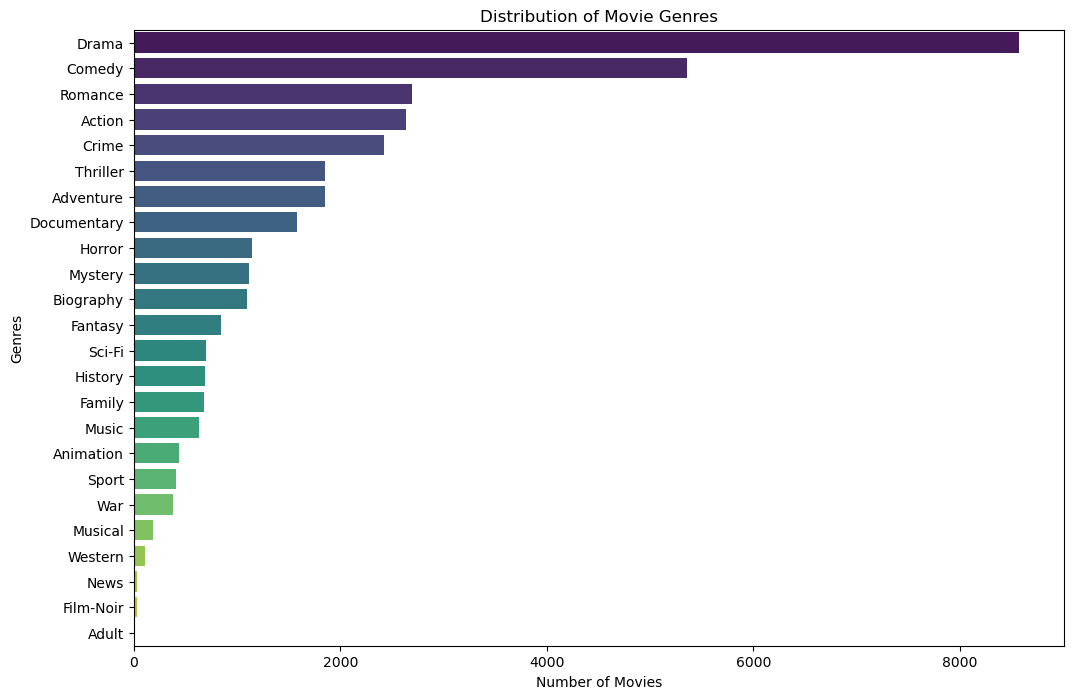

In [21]:
genres_exploded = df['genres'].str.get_dummies(sep=',')
genres_counts = genres_exploded.sum().sort_values(ascending=False)

# Plot the genres distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=genres_counts.values, y=genres_counts.index, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()

In [22]:
# print the number of samples marked as news, adult or film-noir, from the genres_exploded df
print(genres_exploded['Musical'].sum())
print(genres_exploded['Western'].sum())
print(genres_exploded['News'].sum())
print(genres_exploded['Adult'].sum())
print(genres_exploded['Film-Noir'].sum())

186
113
27
8
27


In [23]:
# Combining the last 3 genres into a single genre called 'Other'
df['genres'] = df['genres'].apply(lambda x: 'Other' if 'News' in x or 'Adult' in x or 'Film-Noir' in x else x)

In [24]:
del genres_exploded
del genres_counts

Checking the values of the lifetimeGross feature

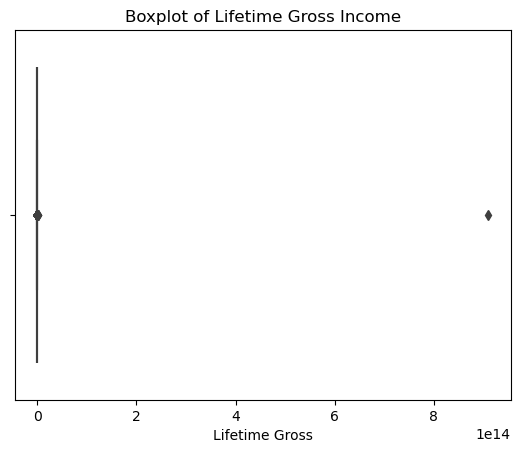

In [25]:
sns.boxplot(data=df, x='lifetimeGross')
plt.title('Boxplot of Lifetime Gross Income')
plt.xlabel('Lifetime Gross')
plt.show()

In [26]:
df['lifetimeGross'].describe()

count    1.526400e+04
mean     5.978246e+10
std      7.368568e+12
min      1.820000e+01
25%      1.050880e+05
50%      1.731936e+06
75%      1.930893e+07
max      9.103684e+14
Name: lifetimeGross, dtype: float64

In [27]:
print(df[df['lifetimeGross'] > 1e9].shape[0])

58


In [28]:
df = df[df['lifetimeGross'] < 1e9]

In [29]:
df['lifetimeGross'].describe()

count    1.520500e+04
mean     2.381041e+07
std      6.476318e+07
min      1.820000e+01
25%      1.044420e+05
50%      1.700000e+06
75%      1.884843e+07
max      9.810000e+08
Name: lifetimeGross, dtype: float64

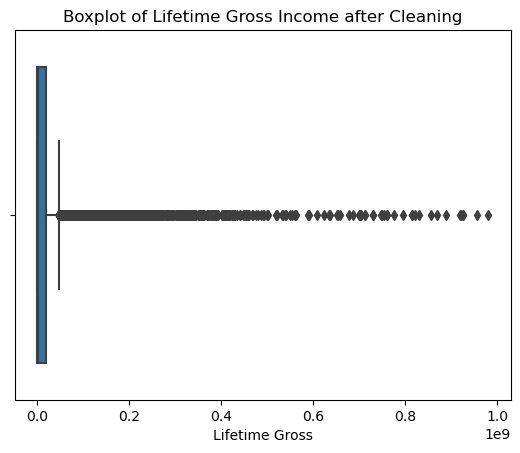

In [30]:
sns.boxplot(data=df, x='lifetimeGross')
plt.title('Boxplot of Lifetime Gross Income after Cleaning')
plt.xlabel('Lifetime Gross')
plt.show()

Checking the values of nrOfReleases feature

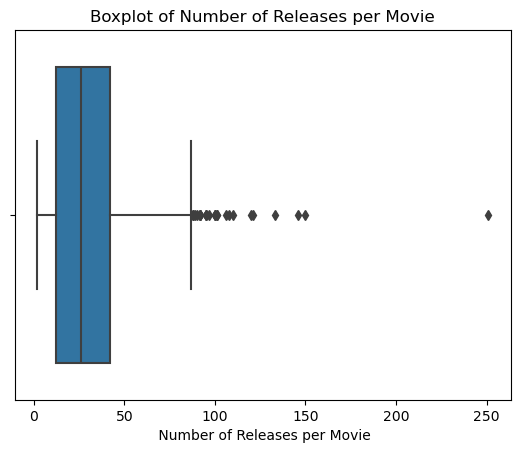

In [31]:
sns.boxplot(data=df, x='nrOfReleases')
plt.title('Boxplot of Number of Releases per Movie')
plt.xlabel(' Number of Releases per Movie')
plt.show()

In [32]:
print(df[df['nrOfReleases'] > 80].shape[0])

57


In [33]:
df = df[df['nrOfReleases'] <= 80]

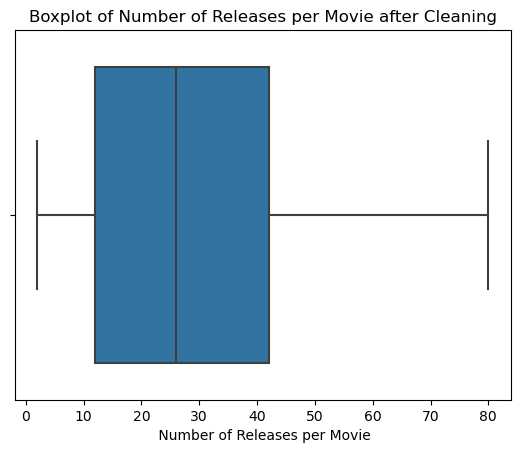

In [34]:
sns.boxplot(data=df, x='nrOfReleases')
plt.title('Boxplot of Number of Releases per Movie after Cleaning')
plt.xlabel(' Number of Releases per Movie')
plt.show()

Checking the values of nr of directed movies for the main director of each movie

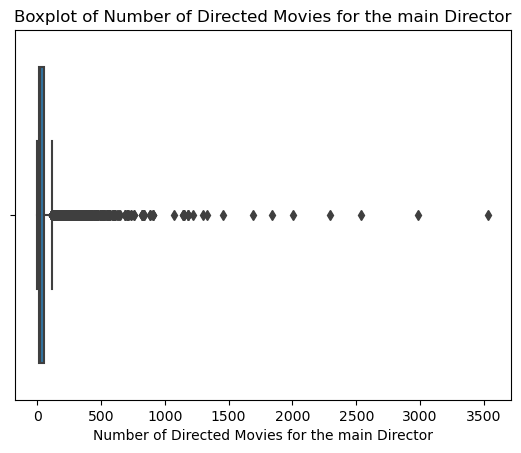

In [35]:
sns.boxplot(data=df, x='director_nrOfMovies')
plt.title('Boxplot of Number of Directed Movies for the main Director')
plt.xlabel('Number of Directed Movies for the main Director')
plt.show()

In [36]:
print(df[df['director_nrOfMovies'] > 500].shape[0])

79


In [37]:
df = df[df['director_nrOfMovies'] <= 500]

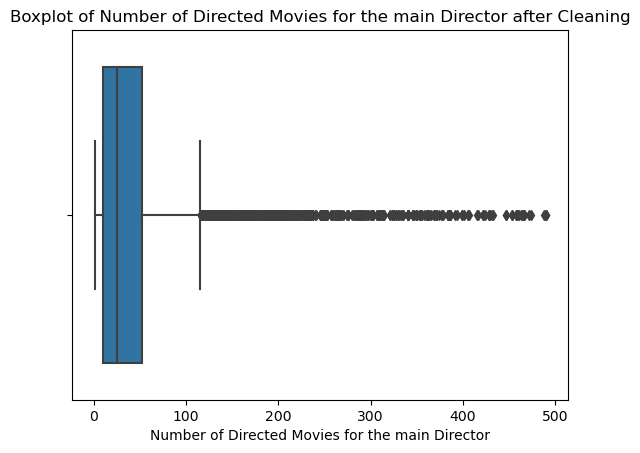

In [38]:
sns.boxplot(data=df, x='director_nrOfMovies')
plt.title('Boxplot of Number of Directed Movies for the main Director after Cleaning')
plt.xlabel('Number of Directed Movies for the main Director')
plt.show()

Checking the values of the nrOfEmployees feature

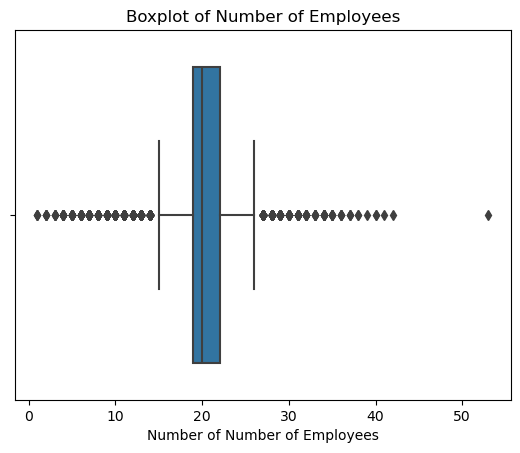

In [39]:
sns.boxplot(data=df, x='nrOfEmployees')
plt.title('Boxplot of Number of Employees')
plt.xlabel('Number of Number of Employees')
plt.show()

In [40]:
print(df[df['nrOfEmployees'] > 40].shape[0])

3


In [41]:
df = df[df['nrOfEmployees'] <= 40]

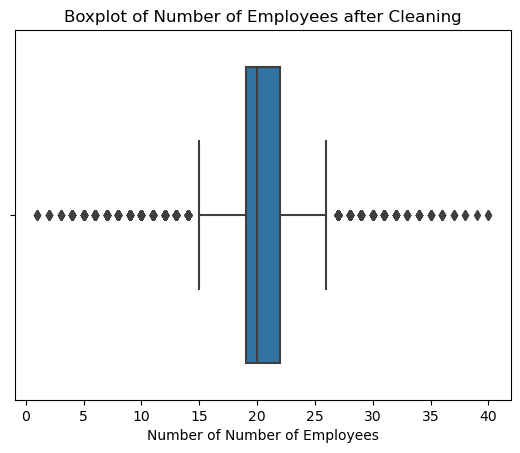

In [42]:
sns.boxplot(data=df, x='nrOfEmployees')
plt.title('Boxplot of Number of Employees after Cleaning')
plt.xlabel('Number of Number of Employees')
plt.show()

Checking the values of the nrOfActors feature

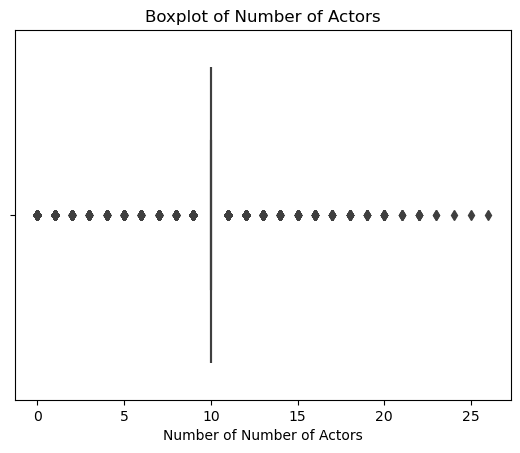

In [43]:
sns.boxplot(data=df, x='nrOfActors')
plt.title('Boxplot of Number of Actors')
plt.xlabel('Number of Number of Actors')
plt.show()

Checking the values from the numVotes feature

In [44]:
df['numVotes'].describe()

count    1.506600e+04
mean     5.413170e+04
std      1.431052e+05
min      6.000000e+00
25%      1.369000e+03
50%      7.229000e+03
75%      3.945400e+04
max      2.881649e+06
Name: numVotes, dtype: float64

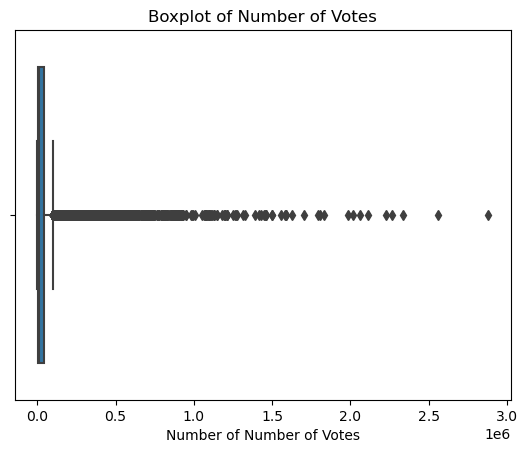

In [45]:
sns.boxplot(data=df, x='numVotes')
plt.title('Boxplot of Number of Votes')
plt.xlabel('Number of Number of Votes')
plt.show()

In [46]:
print(df[df['numVotes'] > 1e6].shape[0])

59


In [47]:
df = df[df['numVotes'] <= 1e6]

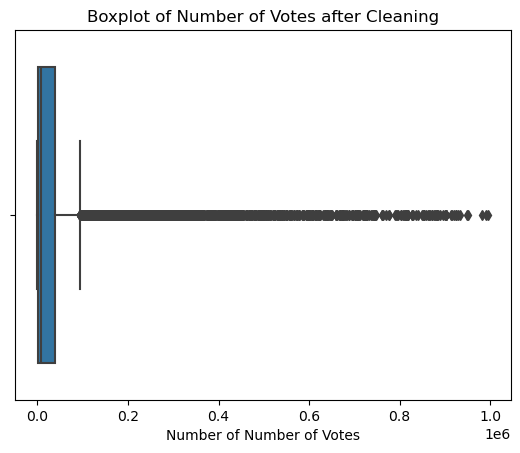

In [48]:
sns.boxplot(data=df, x='numVotes')
plt.title('Boxplot of Number of Votes after Cleaning')
plt.xlabel('Number of Number of Votes')
plt.show()

Checking the values of the sameYearTotalMoviesReleased feature

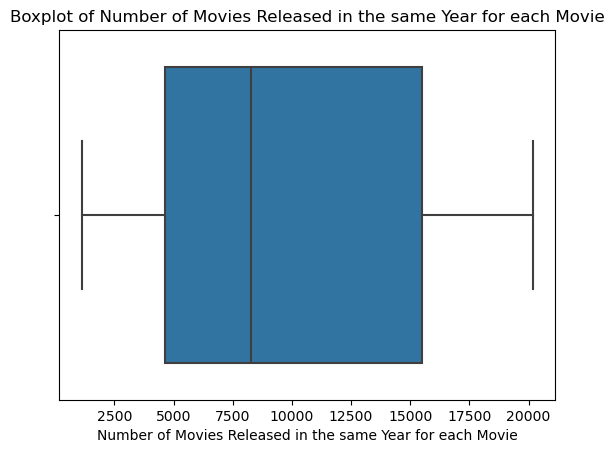

In [49]:
sns.boxplot(data=df, x='sameYearTotalMoviesReleased')
plt.title('Boxplot of Number of Movies Released in the same Year for each Movie')
plt.xlabel('Number of Movies Released in the same Year for each Movie')
plt.show()

Labeling / encoding

In [50]:
df['genres'] = df['genres'].str.split(',')
df = pd.concat([df, df['genres'].str.join('|').str.get_dummies()], axis=1)
df.drop('genres', axis=1, inplace=True)

Scaling

In [51]:
scaler = MinMaxScaler()
columns_to_scale = ['releaseYear', 'runtimeMinutes', 'lifetimeGross',
                    'nrOfReleases', 'director_nrOfMovies', 'nrOfEmployees',
                    'nrOfActors', 'numVotes', 'sameYearTotalMoviesReleased']

df_scaled = df.copy()

df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

In [52]:
df_scaled.to_csv('Data/dataset_preprocessed.csv', index=False)